In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import ElasticNetCV
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)
from matplotlib.pyplot import figure

In [3]:
dset =pd.read_excel('Cleansing_data_df.xlsx')
dset = dset.set_index("Date") # set "Date" to indexes of the column

In [4]:
maxlag=10
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [5]:
grangers_causation_matrix(dset, variables = dset.columns)

,CPI_df_x,QE_df_x,FedfundR_df_x,PPI_df_x,PolUnc_df_x,M2_df_x,REER_df_x,Spot oil (% change)_x,IndPro_df_x,HouseDS_df_x,TruckEm_df_x,AvgWage_df_x,Loan_df_x,ConConf_df_x,Gov_bud_df_x,PCE_df_x,Retail_sales_x,SP500_df_x,Unemp_df_x
CPI_df_y,1.0000,0.0833,0.0442,0.0005,0.2244,0.0136,0.4582,0.0003,0.0005,0.0477,0.0165,0.0027,0.0000,0.3236,0.3291,0.0000,0.0000,0.0885,0.0118
QE_df_y,0.2781,1.0000,0.0172,0.0000,0.0000,0.0448,0.0210,0.1749,0.0192,0.0491,0.1948,0.6571,0.5931,0.0175,0.6171,0.4292,0.6108,0.0047,0.3174
FedfundR_df_y,0.5600,0.0248,1.0000,0.0172,0.1176,0.0455,0.0103,0.1544,0.0004,0.0302,0.0019,0.0021,0.0005,0.0216,0.7334,0.0024,0.0323,0.0107,0.0045
PPI_df_y,0.5934,0.0000,0.4032,1.0000,0.0006,0.0180,0.0000,0.0001,0.2225,0.3304,0.1443,0.0155,0.0107,0.0031,0.5694,0.4493,0.5333,0.0000,0.0077
PolUnc_df_y,0.1320,0.4305,0.2911,0.0008,1.0000,0.0214,0.0554,0.1269,0.0990,0.0454,0.1444,0.1640,0.1182,0.4337,0.6320,0.0462,0.0568,0.0002,0.3336
M2_df_y,0.0350,0.0001,0.0662,0.0037,0.0269,1.0000,0.0071,0.0000,0.0000,0.4660,0.0007,0.0003,0.0000,0.0271,0.5071,0.0000,0.0000,0.0003,0.0001
REER_df_y,0.0244,0.0014,0.0092,0.1035,0.1549,0.0499,1.0000,0.6787,0.1064,0.7295,0.1941,0.6751,0.4399,0.5902,0.4971,0.5957,0.6600,0.0052,0.3626
Spot oil (% change)_y,0.1276,0.0396,0.0729,0.0098,0.1250,0.0000,0.0119,1.0000,0.0000,0.3265,0.0000,0.0000,0.0006,0.0861,0.6601,0.0000,0.0093,0.0000,0.0000
IndPro_df_y,0.0168,0.0049,0.0065,0.0002,0.1723,0.0000,0.0020,0.0000,1.0000,0.0046,0.0216,0.0000,0.0000,0.0579,0.7626,0.0000,0.0000,0.0000,0.0000
HouseDS_df_y,0.0265,0.0014,0.1137,0.0000,0.4140,0.0070,0.0440,0.0000,0.0006,1.0000,0.0014,0.2036,0.0647,0.7029,0.2562,0.0000,0.0006,0.0004,0.0003


In [6]:
dset_granger = grangers_causation_matrix(dset, variables = dset.columns).iloc[0:3,].T
dset_granger

,CPI_df_y,QE_df_y,FedfundR_df_y
CPI_df_x,1.0000,0.2781,0.5600
QE_df_x,0.0833,1.0000,0.0248
FedfundR_df_x,0.0442,0.0172,1.0000
PPI_df_x,0.0005,0.0000,0.0172
PolUnc_df_x,0.2244,0.0000,0.1176
M2_df_x,0.0136,0.0448,0.0455
REER_df_x,0.4582,0.0210,0.0103
Spot oil (% change)_x,0.0003,0.1749,0.1544
IndPro_df_x,0.0005,0.0192,0.0004
HouseDS_df_x,0.0477,0.0491,0.0302


In [7]:
def scatter_subs(data, col_1, col_2, color):
    
    """
    Break down scatterplots into different years
    """
    
    data1 = data.loc["2003-02-01":"2011-12-01", :]
    data2 = data.loc["2012-01-01":"2021-07-01", :]

    fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=True)
    
    ax[0].scatter(x=data1[col_1], y=data1[col_2], alpha=0.4, color=color)
    ax[1].scatter(x=data2[col_1], y=data2[col_2], alpha=0.4, color=color)

    ax[0].set_title("2003-2011", fontsize=14, fontname="Verdana")
    ax[1].set_title("2012-2021", fontsize=14, fontname="Verdana")

    for i in list(range(2)):
        ax[i].set_xlabel("Inflation")
        ax[i].set_ylabel(col_2)

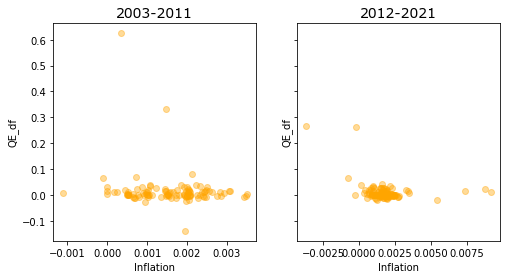

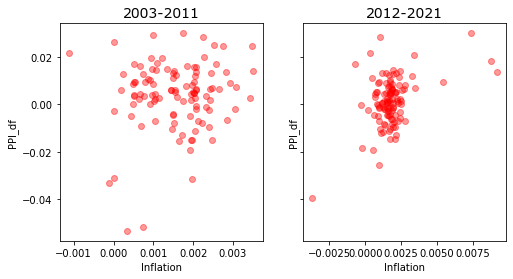

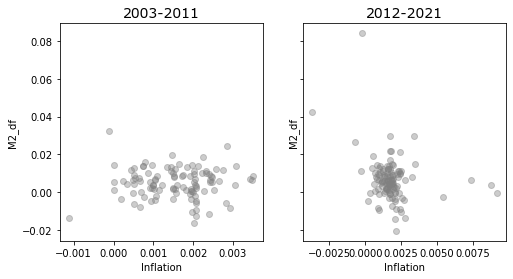

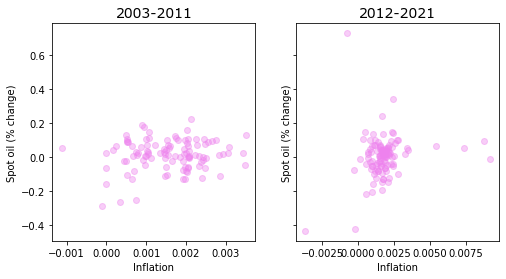

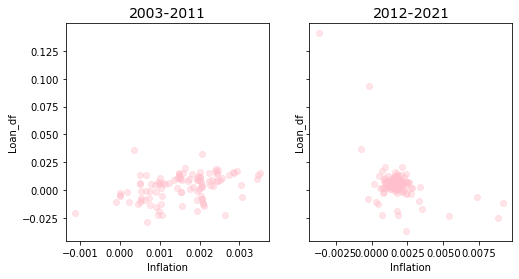

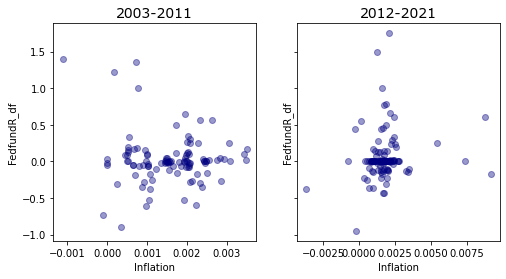

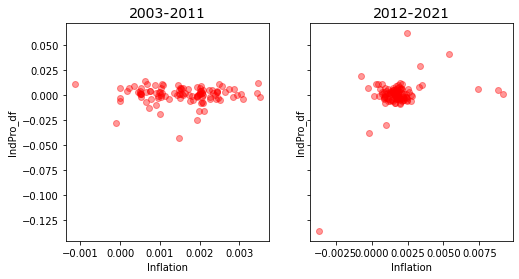

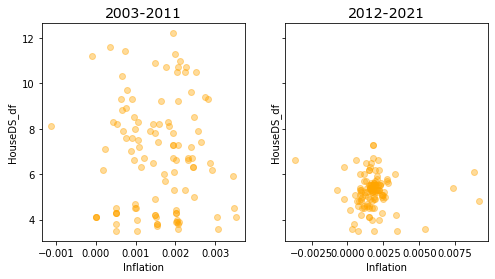

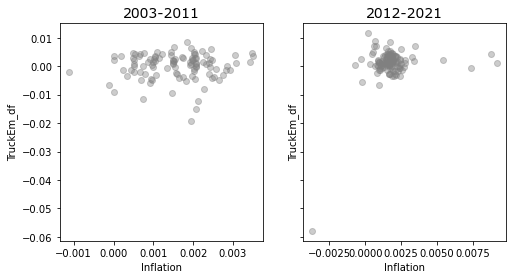

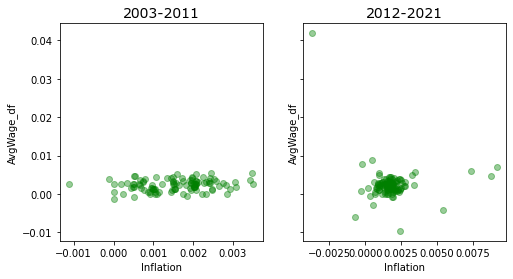

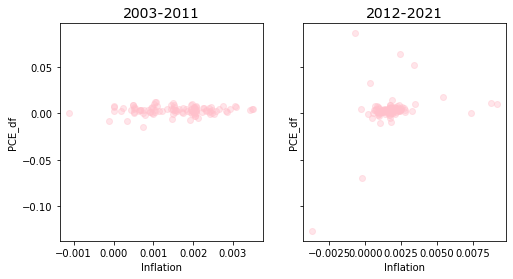

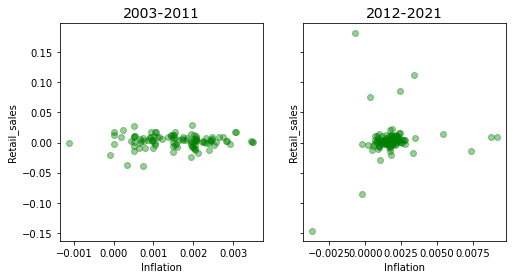

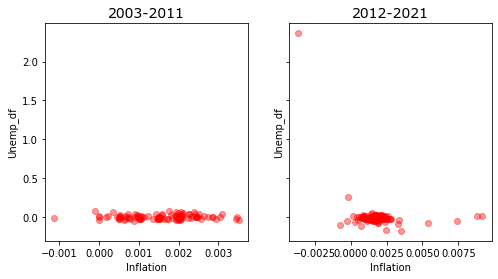

In [8]:
scatter_subs(data=dset, col_1="CPI_df", col_2="QE_df", color="orange")
scatter_subs(data=dset, col_1="CPI_df", col_2="PPI_df", color="red")
scatter_subs(data=dset, col_1="CPI_df", col_2="M2_df", color="gray")
scatter_subs(data=dset, col_1="CPI_df", col_2="Spot oil (% change)", color="violet")
scatter_subs(data=dset, col_1="CPI_df", col_2="Loan_df", color="pink")
scatter_subs(data=dset, col_1="CPI_df", col_2="FedfundR_df", color="navy")
scatter_subs(data=dset, col_1="CPI_df", col_2="IndPro_df", color="red")
scatter_subs(data=dset, col_1="CPI_df", col_2="HouseDS_df", color="orange")
scatter_subs(data=dset, col_1="CPI_df", col_2="TruckEm_df", color="gray")
scatter_subs(data=dset, col_1="CPI_df", col_2="AvgWage_df", color="green")
scatter_subs(data=dset, col_1="CPI_df", col_2="PCE_df", color="pink")
scatter_subs(data=dset, col_1="CPI_df", col_2="Retail_sales", color="green")
scatter_subs(data=dset, col_1="CPI_df", col_2="Unemp_df", color="red")

In [9]:
y = dset.iloc[:,0:3]*100  #state variables
x = dset.iloc[:,[5,7,8,9,10,11,12,15,16,18]]*100 # controls based on the Granger causality
z = dset.iloc[:,[0,2,3,5,7,8,9,10,11,12,15,16,18]]*100
z

,CPI_df,FedfundR_df,PPI_df,M2_df,Spot oil (% change),IndPro_df,HouseDS_df,TruckEm_df,AvgWage_df,Loan_df,PCE_df,Retail_sales,Unemp_df
Date,,,,,,,,,,,,,
2003-02-01,0.051975,0.000000,1.699931,0.897829,8.9,0.119056,450.0,-0.218193,0.459921,-0.918154,0.096800,-1.382228,1.724138
2003-03-01,0.000000,3.759398,2.616279,1.450300,-6.5,-0.298380,410.0,0.346856,-0.130804,-0.437918,0.833267,1.771492,0.000000
2003-04-01,0.000000,-5.072464,-3.116152,0.107090,-15.8,-0.631653,410.0,-0.894199,0.065488,-0.257970,0.302174,-0.244664,1.694915
2003-05-01,0.207792,-2.290076,-0.073095,0.324322,-0.4,-0.031441,390.0,0.090985,0.327225,-1.178960,0.206955,0.274019,1.666667
2003-06-01,0.051840,13.281250,0.950983,1.257553,9.2,0.133420,350.0,0.060601,0.195695,-0.724219,0.644419,1.084984,3.278689
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,0.338514,-14.285714,2.089272,2.960051,5.6,2.868566,420.0,0.175866,0.238001,0.251934,5.165447,11.277211,-3.225806
2021-04-01,0.916619,-16.666667,1.348831,-0.069419,-1.0,0.068877,480.0,0.121540,0.712307,-1.209484,1.007187,0.903840,1.666667
2021-05-01,0.737304,0.000000,2.983023,0.626200,5.6,0.625113,540.0,-0.053952,0.589391,-0.621927,0.054436,-1.372881,-4.918033


In [10]:
for i in range(1,15):
    model = VAR(z)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

C:\Users\jihon\Anaconda3\envs\MLforFin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jihon\Anaconda3\envs\MLforFin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jihon\Anaconda3\envs\MLforFin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jihon\Anaconda3\envs\MLforFin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jihon\Anaconda3\envs\MLforFin\lib\site-packages\sta

Order = 1
AIC:  8.811741496762771
BIC:  11.610228427424449

Order = 2
AIC:  8.41179971195372
BIC:  13.826178206361352

Order = 3
AIC:  7.635300629040749
BIC:  15.682411585682669

Order = 4
AIC:  7.997383095002021
BIC:  18.694250518220745

Order = 5
AIC:  8.125904223651194
BIC:  21.48973799940103

Order = 6
AIC:  8.284079906745456
BIC:  24.332278632169704

Order = 7
AIC:  8.450107004230128
BIC:  27.200260872326336

Order = 8
AIC:  8.22584538200895
BIC:  29.695739122685712

Order = 9
AIC:  7.755745836030359
BIC:  31.96336171489542

Order = 10
AIC:  6.39557463810975
BIC:  33.35909551436653

Order = 11
AIC:  5.240538120918581
BIC:  34.978350565786805

Order = 12
AIC:  3.1122559873605837
BIC:  35.64295346447655

Order = 13
AIC:  -0.7185959948060443
BIC:  34.62379011448694

Order = 14
AIC:  -8.0617394311553
BIC:  30.111352355428526



C:\Users\jihon\Anaconda3\envs\MLforFin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jihon\Anaconda3\envs\MLforFin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jihon\Anaconda3\envs\MLforFin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jihon\Anaconda3\envs\MLforFin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jihon\Anaconda3\envs\MLforFin\lib\site-packages\sta

In [11]:
model = VAR(z)
result_VAR = model.fit(12)

C:\Users\jihon\Anaconda3\envs\MLforFin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [12]:
result_VAR.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 30, Sep, 2021
Time:                     12:09:49
--------------------------------------------------------------------
No. of Equations:         13.0000    BIC:                    35.6430
Nobs:                     210.000    HQIC:                   16.2632
Log likelihood:          -2159.49    FPE:                    6836.76
AIC:                      3.11226    Det(Omega_mle):         4.81995
--------------------------------------------------------------------
Results for equation CPI_df
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.002089         0.069516            0.030           0.976
L1.CPI_df                       0.082368         0.135809            0.607           0.544
L1.FedfundR_df     

In [13]:
#results.plot()

C:\Users\jihon\Anaconda3\envs\MLforFin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


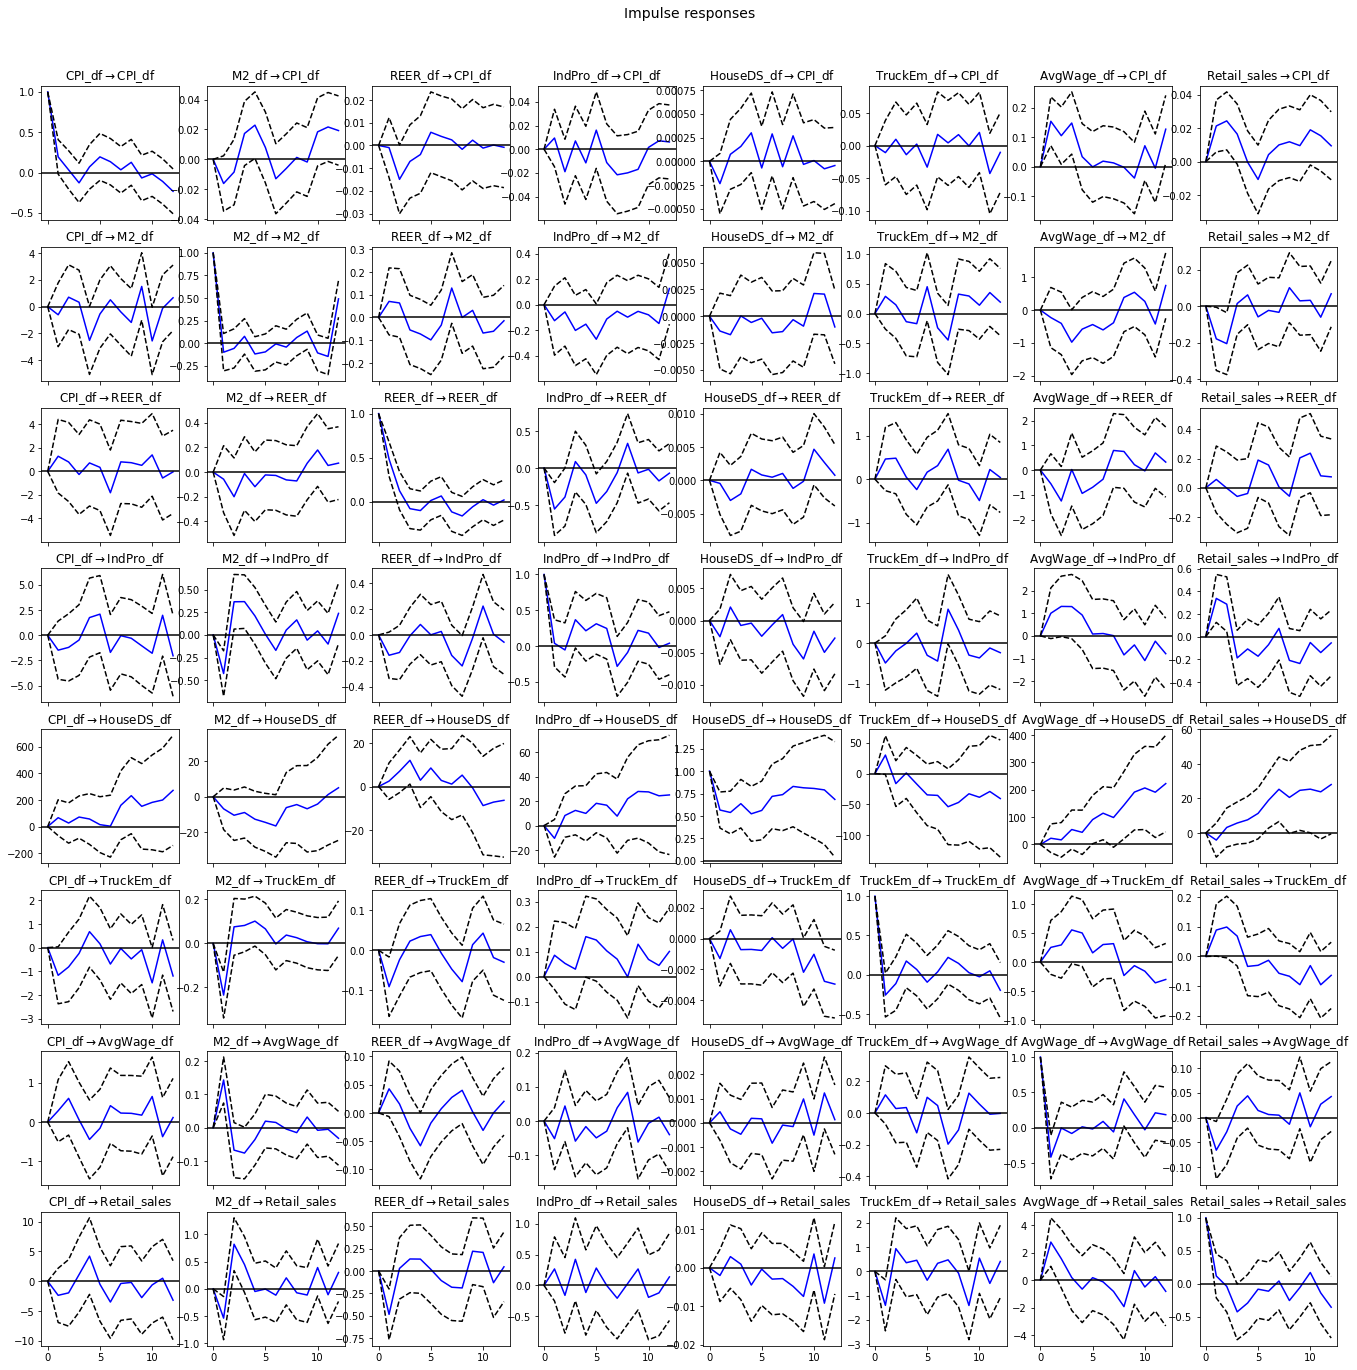

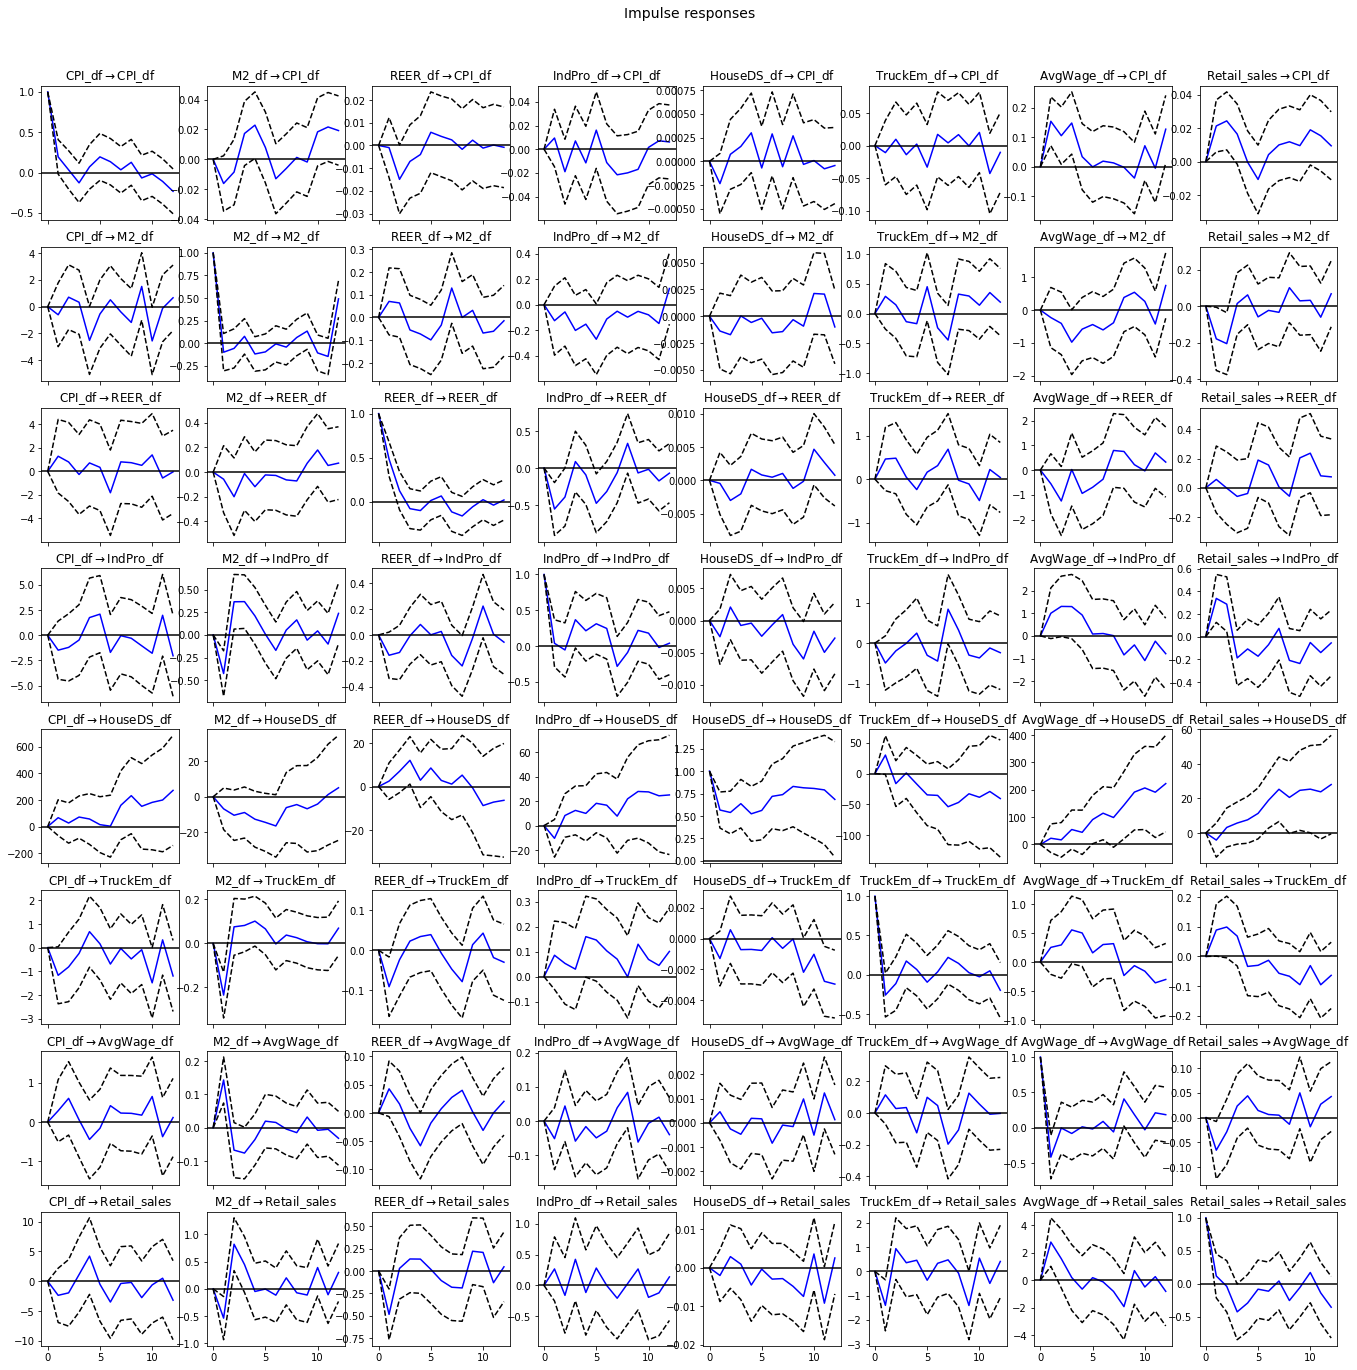

In [14]:
dset_fdb = dset.iloc[:,[0,5,6,8,9,10,11,16]]

model_irf = VAR(dset_fdb)
result_irf = model_irf.fit(12)
irf = result_irf.irf(12)
irf.plot(orth=False, figsize=(20,20))